# Data

In [1]:
from dotenv import load_dotenv
load_dotenv()

True

## 01 data loading

In [2]:
import os
import pandas as pd
import numpy as np

In [3]:
base_path = os.path.dirname(os.path.dirname(os.getcwd()))
x_mix_path = os.path.join(base_path,os.getenv("Y_LABEL"))
y_mix_path = os.path.join(base_path,os.getenv("Y_LABEL"))

In [4]:
# 讀取 x 和 y 的資料
x_mix_gdp = pd.read_csv(x_mix_path)
y_mix_gdp = pd.read_csv(y_mix_path)

In [5]:
x_mix_gdp

,年份,季別,GDP
0,1982,1,461774
1,1982,2,488234
2,1982,3,489504
3,1982,4,498511
4,1983,1,495361
...,...,...,...
167,2023,4,6380686
168,2024,1,6111775
169,2024,2,6233160
170,2024,3,6437479


In [6]:
y_mix_gdp

,年份,季別,GDP
0,1982,1,461774
1,1982,2,488234
2,1982,3,489504
3,1982,4,498511
4,1983,1,495361
...,...,...,...
167,2023,4,6380686
168,2024,1,6111775
169,2024,2,6233160
170,2024,3,6437479


In [5]:
x_mix_gdp_drop=x_mix_gdp.drop(columns=['年份', '季別'])
y_mix_gdp_drop=y_mix_gdp.drop(columns=['年份', '季別'])

## 02 data MinMaxScaler

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

T3_X_scaled = scaler_X.fit_transform(x_mix_gdp_drop)
T3_y_scaled = scaler_y.fit_transform(y_mix_gdp_drop)

## 03 Feaature with T3

- T3_X_scaled 
- T3_y_scaled

In [8]:
T3_x,T3_y=[],[]


for i in range(4,len(T3_X_scaled)):
    T3_x.append([T3_X_scaled[i-1],T3_X_scaled[i-2],T3_X_scaled[i-3]])

for i in range(4,len(T3_y_scaled)):
    T3_y.append([T3_y_scaled[i]])


T3_x=np.array(T3_x)
T3_x=T3_x.reshape(T3_x.shape[0], -1)

T3_y=np.array(T3_y)
T3_y=T3_y.reshape(T3_y.shape[0], -1)

In [11]:
T3_x.shape

(168, 3)

In [12]:
T3_y.shape

(168, 1)

## 04 data spliting 80 & 20

In [9]:
train_size = int(len(T3_x) * 0.8)

In [10]:
train_x_t3, test_x_t3 = T3_x[:train_size], T3_x[train_size:]
train_y_t3, test_y_t3 = T3_y[:train_size], T3_y[train_size:]

In [15]:
len(train_x_t3)

134

In [16]:
len(train_y_t3,)

134

In [17]:
len(test_x_t3)

34

In [18]:
len(test_y_t3)

34

In [19]:
# training data start in 1983 Q1
train_y_t3[0]

array([0.0052904])

In [20]:
# training data stop in 2015 Q3
train_y_t3[-1]

array([0.59805036])

In [21]:
# testing data start in 2015 Q4
test_y_t3[0]

array([0.61935846])

In [22]:
# testing data start in 2023 Q4
test_y_t3[-1]

array([1.])

In [11]:
real_train_y = scaler_y.inverse_transform(train_y_t3)
real_test_y = scaler_y.inverse_transform(test_y_t3)

# Model

- training data (train_y_t3 & train_x_t3) : 1982 q4 to 2015 q3 (130)
    - train_x_t3_scaled (x)

- testing data (test_y_t3 & test_x_t3) : 2015 q4 to 2023 q4 (33)
    - test_x_t3_scaled (x)


In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [13]:
# 評估
def eval_metrics(y_true, y_pred, name=""):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    print(f"{name} ➤ MSE: {mse:.2f}, RMSE: {rmse:.2f}, MAE: {mae:.2f}")
    return mse, rmse, mae

In [14]:
def plot_gdp_forecast(year,name, test_actual, test_pred):
    plt.figure(figsize=(16, 7))

    # 畫出四條線
    plt.plot(year.iloc[138:],test_actual, label='Test Actual', color='green', linestyle='-')
    plt.plot(year.iloc[138:],test_pred, label='Test Predicted', color='orange', linestyle='--')

    # 標題與座標軸
    plt.title(f'GDP Forecast with {name}', fontsize=16)
    plt.xlabel('Time', fontsize=14)
    plt.ylabel('GDP Value', fontsize=14)

    plt.xticks(year[138:],rotation=45)
    
    # 顯示圖例
    plt.legend()

    # 顯示網格
    plt.grid(True, linestyle='--', alpha=0.7)

    # 顯示圖片
    plt.show()

## GB

In [15]:
from sklearn.ensemble import GradientBoostingRegressor

In [28]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [500, 1000],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [6,12],
    "min_samples_split": [5, 10],
    "min_samples_leaf": [3, 5],
    "subsample": [0.7,0.95],
    "max_features": [0.8, 1.0]
}
gb_model = GradientBoostingRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=gb_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  
    cv=5,
    n_jobs=-1,
    verbose=2
)
grid_search.fit(train_x_t3, train_y_t3)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=3,

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_le

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samp

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=5

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_l

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_sample

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, max_features=0.8, min_samples_leaf

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_le

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_le

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_lea

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_lea

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   0.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   0.8s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_sampl

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_sam

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samp

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   0.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, mi

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_sam

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_sam

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   0.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=12, max_features=0.8, min_samples_

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_sampl

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, mi

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_sample

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samp

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_sa

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, m

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_lea

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_le

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_lea

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samp

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_le

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   0.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_l

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   0.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_lea

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_lea

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samp

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_lea

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   0.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_sampl

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=6, max_features=1.0, min_sampl

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_sa

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_sam

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_s

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_sam

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_s

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_sam

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_sam

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_sa

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_s

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_sa

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_sa

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_l

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=3, 

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   0.1s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=5,

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=5, m

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=5, m

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=5

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, max_features=0.8, min_samples_leaf=5, min_s

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=3, 

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=3

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=3, min_sa

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=5, m

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=5, m

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_lea

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_lea

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_lea

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_l

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_sampl

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=3,

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.7s
[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.8s
[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.8s
[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.8s
[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.8s
[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.9s
[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.9s
[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_le

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   0.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   0.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=12, max_features=0.8, min_samples_leaf

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_l

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_l

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   0.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=500, subsample=0.95; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_le

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y w

[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=5, n_estimators=1000, subsample=0.95; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=500, subsample=0.95; total time=   0.2s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.7; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_sampl

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=12, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, subsample=0.95; total time=   0.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


,estimator,GradientBoost...ndom_state=42)
,param_grid,"{'learning_rate': [0.01, 0.05, ...], 'max_depth': [6, 12], 'max_features': [0.8, 1.0], 'min_samples_leaf': [3, 5], ...}"
,scoring,'neg_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,loss,'squared_error'


In [29]:
print("✅ 最佳參數組合：", grid_search.best_params_)
print("📉 最佳分數（MSE）：", -grid_search.best_score_)

✅ 最佳參數組合： {'learning_rate': 0.1, 'max_depth': 12, 'max_features': 1.0, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 1000, 'subsample': 0.95}
📉 最佳分數（MSE）： 0.0033472519637535907


In [16]:

gb_model = GradientBoostingRegressor(
    n_estimators=1000,
    learning_rate=0.1,
    max_depth=12,
    min_samples_split=5,
    min_samples_leaf=3,
    subsample=0.95,
    max_features=1.0,
    random_state=42
)
gb_model.fit(train_x_t3, train_y_t3)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


,loss,'squared_error'
,learning_rate,0.1
,n_estimators,1000
,subsample,0.95
,criterion,'friedman_mse'
,min_samples_split,5
,min_samples_leaf,3
,min_weight_fraction_leaf,0.0
,max_depth,12
,min_impurity_decrease,0.0
,init,None


In [17]:
# 預測
gb_y_train_pred = gb_model.predict(train_x_t3)
gb_y_test_pred = gb_model.predict(test_x_t3)


gb_y_train_pred = scaler_y.inverse_transform(gb_y_train_pred.reshape(-1, 1))
gb_y_test_pred = scaler_y.inverse_transform(gb_y_test_pred.reshape(-1, 1))

In [18]:
print("\n📊 訓練集表現：")
eval_metrics(real_train_y, gb_y_train_pred, "Train")

print("\n📊 測試集表現：")
eval_metrics(real_test_y, gb_y_test_pred, "Test")


📊 訓練集表現：
Train ➤ MSE: 10420404.74, RMSE: 3228.07, MAE: 408.74

📊 測試集表現：
Test ➤ MSE: 1429815610443.63, RMSE: 1195748.97, MAE: 981534.02


(1429815610443.631, 1195748.9746780598, 981534.0167793573)

In [19]:
print(f"\n📊 預測的平均值：{gb_y_test_pred.mean():.2f}")


📊 預測的平均值：4259407.25


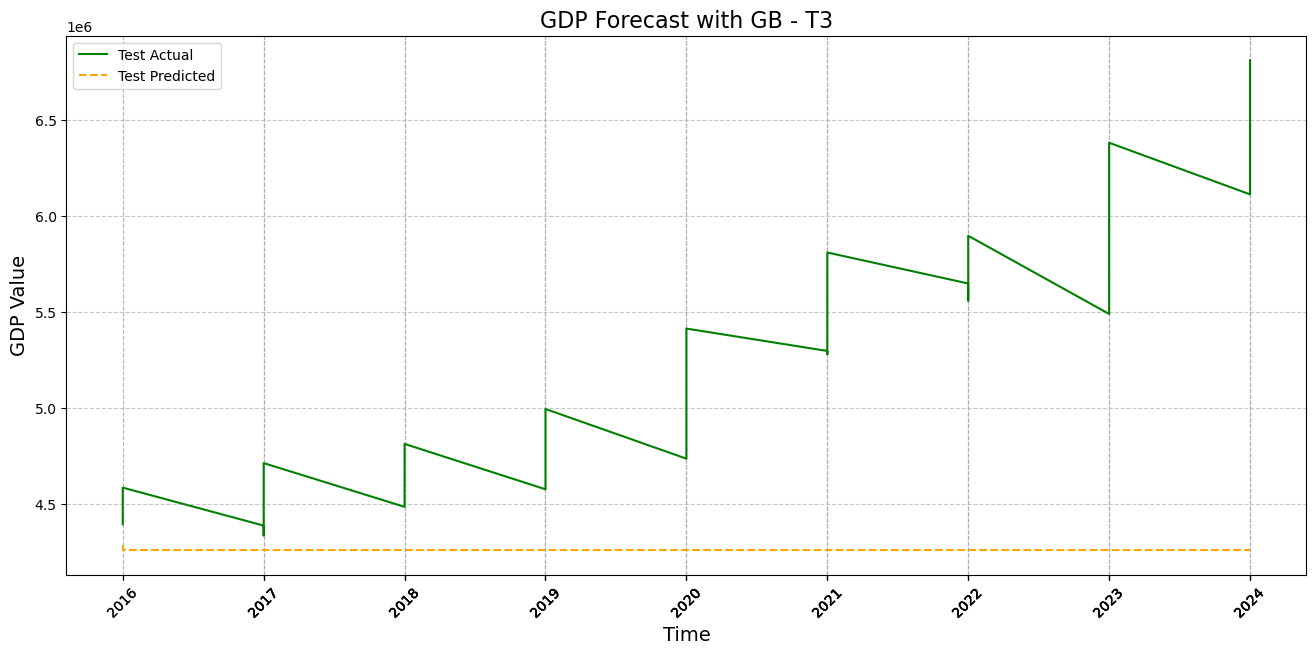

In [58]:
plot_gdp_forecast(y_mix_gdp['年份'],"GB - T3",real_test_y,gb_y_test_pred)

## Xgb

In [20]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

In [35]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [500, 1000],
    "learning_rate": [0.01, 0.1],
    "max_depth": [6, 8, 10],
    "subsample": [0.7, 0.85, 0.95],
    "colsample_bytree": [0.6, 1.0],
    "min_child_weight": [3, 5, 7],
    "gamma": [0, 0.3],
    "reg_alpha": [0,1],
    "reg_lambda": [1,3]
}


xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring="neg_mean_squared_error",  # 或 "neg_mean_absolute_error"
    cv=5,
    n_jobs=-1,
    verbose=2
)
grid_search.fit(train_x_t3, train_y_t3)


Fitting 5 folds for each of 1728 candidates, totalling 8640 fits
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.85; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=500, reg_alpha=0, reg_lambda=1, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=6, m

,estimator,"XGBRegressor(...ree=None, ...)"
,param_grid,"{'colsample_bytree': [0.6, 1.0], 'gamma': [0, 0.3], 'learning_rate': [0.01, 0.1], 'max_depth': [6, 8, ...], ...}"
,scoring,'neg_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'reg:squarederror'


In [36]:
print("✅ 最佳參數組合：", grid_search.best_params_)
print("📉 最佳分數（MSE）：", -grid_search.best_score_)

✅ 最佳參數組合： {'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 10, 'min_child_weight': 3, 'n_estimators': 1000, 'reg_alpha': 0, 'reg_lambda': 3, 'subsample': 0.7}
📉 最佳分數（MSE）： 0.004409058660107371


In [21]:
xgb_model = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=10,
    subsample=0.7,
    colsample_bytree=0.6,
    min_child_weight=3,
    gamma=0,
    random_state=42,
    reg_alpha=0,        
    reg_lambda=3
)

xgb_model.fit(train_x_t3, train_y_t3)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.6
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [22]:
# 預測
xgb_y_train_pred = xgb_model.predict(train_x_t3)
xgb_y_test_pred = xgb_model.predict(test_x_t3)

xgb_y_train_pred = scaler_y.inverse_transform(xgb_y_train_pred.reshape(-1, 1))
xgb_y_test_pred = scaler_y.inverse_transform(xgb_y_test_pred.reshape(-1, 1))

In [23]:
print("\n📊 訓練集表現：")
eval_metrics(real_train_y, xgb_y_train_pred, "Train")

print("\n📊 測試集表現：")
eval_metrics(real_test_y, xgb_y_test_pred, "Test")


📊 訓練集表現：
Train ➤ MSE: 1326788387.74, RMSE: 36425.11, MAE: 24248.30

📊 測試集表現：
Test ➤ MSE: 1385965364930.71, RMSE: 1177270.30, MAE: 959748.66


(1385965364930.7131, 1177270.3024075283, 959748.6617647059)

In [24]:
print(f"\n📊 預測的平均值：{xgb_y_test_pred.mean():.2f}")


📊 預測的平均值：4281192.50


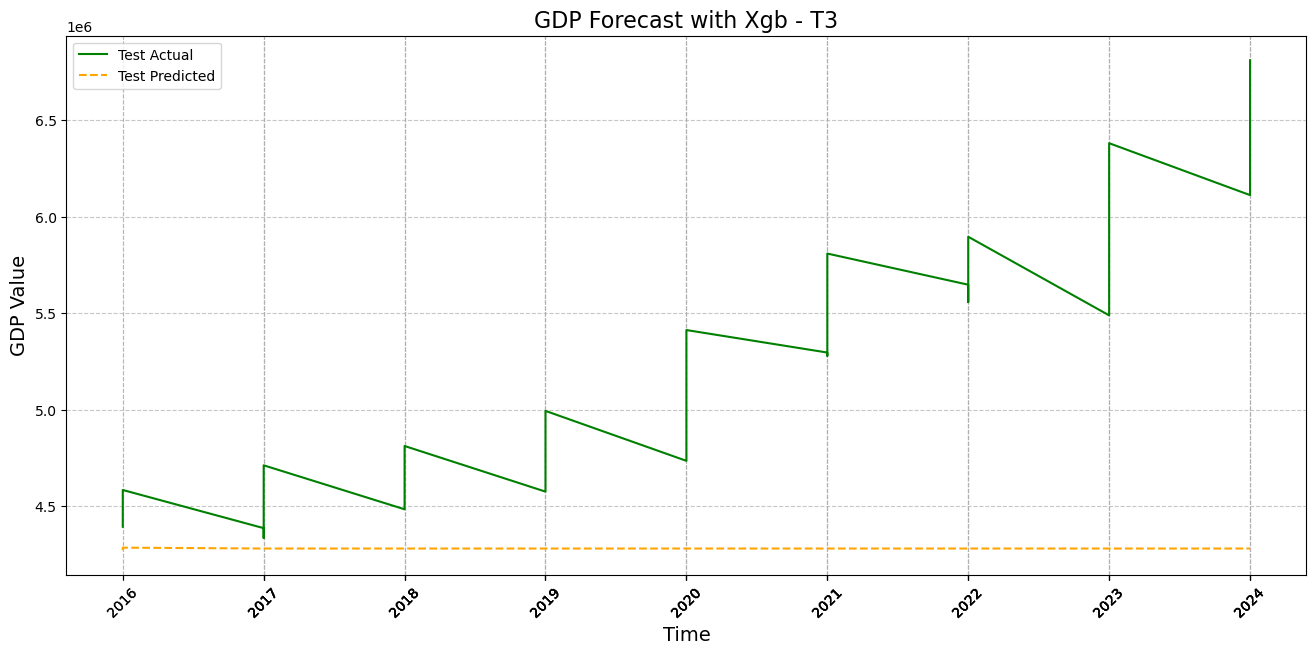

In [54]:
plot_gdp_forecast(y_mix_gdp['年份'],"Xgb - T3",real_test_y,xgb_y_test_pred)

## RF

In [25]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [500,1000],
    "max_depth": [6, 8, 10],
    "min_samples_split": [2, 4, 6],
    "min_samples_leaf": [1,4],
    "max_features": [0.6,1.0]
}
rf_model = RandomForestRegressor(random_state=42)

rf_model = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # 或 'neg_mean_absolute_error'
    cv=5,
    n_jobs=-1,
    verbose=2
)
grid_search.fit(train_x_t3, train_y_t3)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END max_depth=6, max_features=0.6, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END max_depth=6, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.3s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.7s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.7s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.3s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END max_depth=6, max_features=0.6, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.6s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.3s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END max_depth=6, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   0.6s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   0.6s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.3s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   0.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END max_depth=6, max_features=0.6, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.4s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   0.9s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.5s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END max_depth=6, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   0.8s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.5s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.3s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   0.8s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   0.8s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   0.7s
[CV] END max_depth=6, max_features=0.6, min_samples_

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END max_depth=6, max_features=0.6, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.3s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   0.8s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=6, max_features=0.6, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.3s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.3s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   0.6s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   0.6s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   0.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END max_depth=6, max_features=0.6, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   0.7s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   0.7s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END max_depth=6, max_features=0.6, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.3s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.3s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.7s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.3s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.7s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.7s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END max_depth=6, max_features=0.6, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.7s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.3s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=6, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.3s
[CV] END max_depth=6, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=6, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.6s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   0.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END max_depth=6, max_features=0.6, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   0.7s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   0.7s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   0.7s
[CV] END max_depth=6, max_features=0.6, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   0.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END max_depth=6, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=6, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=6, max_features=1.0, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=6, max_features=1.0, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END max_depth=6, max_features=1.0, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END max_depth=6, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.7s
[CV] END max_depth=6, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.8s
[CV] END max_depth=6, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.8s
[CV] END max_depth=6, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.7s
[CV] END max_depth=6, max_features=1.0, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END max_depth=6, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.8s
[CV] END max_depth=6, max_features=1.0, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=6, max_features=1.0, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.6s
[CV] END max_depth=6, max_features=1.0, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   0.9s
[CV] END max_depth=6, max_features=1.0, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.7s
[CV] END max_depth=6, max_features=1.0, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END max_depth=6, max_features=1.0, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   1.1s
[CV] END max_depth=6, max_features=1.0, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.4s
[CV] END max_depth=6, max_features=1.0, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   1.1s
[CV] END max_depth=6, max_features=1.0, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   1.1s
[CV] END max_depth=6, max_features=1.0, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   1.1s
[CV] END max_depth=6, max_features=1.0, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END max_depth=6, max_features=1.0, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=6, max_features=1.0, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.3s
[CV] END max_depth=6, max_features=1.0, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   0.8s
[CV] END max_depth=6, max_features=1.0, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END max_depth=6, max_features=1.0, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   0.8s
[CV] END max_depth=6, max_features=1.0, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   0.9s
[CV] END max_depth=6, max_features=1.0, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=6, max_features=1.0, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   0.8s
[CV] END max_depth=6, max_features=1.0, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END max_depth=6, max_features=1.0, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   1.0s
[CV] END max_depth=6, max_features=1.0, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=6, max_features=1.0, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   0.7s
[CV] END max_depth=6, max_features=1.0, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.5s
[CV] END max_depth=6, max_features=1.0, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.3s
[CV] END max_depth=6, max_features=1.0, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   0.6s
[CV] END max_depth=6, max_features=1.0, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   0.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END max_depth=6, max_features=1.0, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   0.8s
[CV] END max_depth=6, max_features=1.0, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   0.7s
[CV] END max_depth=6, max_features=1.0, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END max_depth=6, max_features=1.0, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END max_depth=6, max_features=1.0, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.3s
[CV] END max_depth=6, max_features=1.0, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.3s
[CV] END max_depth=6, max_features=1.0, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=6, max_features=1.0, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.8s
[CV] END max_depth=6, max_features=1.0, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.8s
[CV] END max_depth=6, max_features=1.0, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.9s
[CV] END max_depth=6, max_features=1.0, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.8s
[CV] END max_depth=6, max_features=1.0, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END max_depth=6, max_features=1.0, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.5s
[CV] END max_depth=6, max_features=1.0, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=8, max_features=0.6, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=8, max_features=0.6, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=8, max_features=0.6, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=6, max_features=1.0, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   0.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END max_depth=6, max_features=1.0, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   0.7s
[CV] END max_depth=6, max_features=1.0, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   0.8s
[CV] END max_depth=6, max_features=1.0, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   0.8s
[CV] END max_depth=6, max_features=1.0, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   0.8s
[CV] END max_depth=8, max_features=0.6, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.3s
[CV] END max_depth=8, max_features=0.6, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END max_depth=8, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END max_depth=8, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=8, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.5s
[CV] END max_depth=8, max_features=0.6, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.9s
[CV] END max_depth=8, max_features=0.6, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.9s
[CV] END max_depth=8, max_features=0.6, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.8s
[CV] END max_depth=8, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END max_depth=8, max_features=0.6, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.8s
[CV] END max_depth=8, max_features=0.6, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.9s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END max_depth=8, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END max_depth=8, max_features=0.6, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=8, max_features=0.6, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.4s
[CV] END max_depth=8, max_features=0.6, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.3s
[CV] END max_depth=8, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   0.7s
[CV] END max_depth=8, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   0.7s
[CV] END max_depth=8, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   0.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END max_depth=8, max_features=0.6, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.3s
[CV] END max_depth=8, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   0.7s
[CV] END max_depth=8, max_features=0.6, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.3s
[CV] END max_depth=8, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   0.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END max_depth=8, max_features=0.6, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=8, max_features=0.6, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=8, max_features=0.6, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=8, max_features=0.6, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   0.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END max_depth=8, max_features=0.6, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   0.7s
[CV] END max_depth=8, max_features=0.6, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   0.7s
[CV] END max_depth=8, max_features=0.6, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   0.8s
[CV] END max_depth=8, max_features=0.6, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   0.7s
[CV] END max_depth=8, max_features=0.6, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=8, max_features=0.6, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END max_depth=8, max_features=0.6, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.3s
[CV] END max_depth=8, max_features=0.6, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.3s
[CV] END max_depth=8, max_features=0.6, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END max_depth=8, max_features=0.6, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   0.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END max_depth=8, max_features=0.6, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   0.6s
[CV] END max_depth=8, max_features=0.6, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   0.7s
[CV] END max_depth=8, max_features=0.6, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.3s
[CV] END max_depth=8, max_features=0.6, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   0.7s
[CV] END max_depth=8, max_features=0.6, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   0.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END max_depth=8, max_features=0.6, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=8, max_features=0.6, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.4s
[CV] END max_depth=8, max_features=0.6, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.4s
[CV] END max_depth=8, max_features=0.6, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.6s
[CV] END max_depth=8, max_features=0.6, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.7s
[CV] END max_depth=8, max_features=0.6, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.4s
[CV] END max_depth=8, max_features=0.6, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END max_depth=8, max_features=0.6, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.6s
[CV] END max_depth=8, max_features=0.6, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.7s
[CV] END max_depth=8, max_features=0.6, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.3s
[CV] END max_depth=8, max_features=0.6, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END max_depth=8, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=8, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=8, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=8, max_features=0.6, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   0.6s
[CV] END max_depth=8, max_features=0.6, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   0.6s
[CV] END max_depth=8, max_features=0.6, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   0.7s
[CV] END max_depth=8, max_features=0.6, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   0.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END max_depth=8, max_features=0.6, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   0.7s
[CV] END max_depth=8, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.3s
[CV] END max_depth=8, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=8, max_features=1.0, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.3s
[CV] END max_depth=8, max_features=1.0, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=8, max_features=1.0, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END max_depth=8, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.7s
[CV] END max_depth=8, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.7s
[CV] END max_depth=8, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.7s
[CV] END max_depth=8, max_features=1.0, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.3s
[CV] END max_depth=8, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.8s
[CV] END max_depth=8, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END max_depth=8, max_features=1.0, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=8, max_features=1.0, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.5s
[CV] END max_depth=8, max_features=1.0, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.6s
[CV] END max_depth=8, max_features=1.0, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.6s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=8, max_features=1.0, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   0.8s
[CV] END max_depth=8, max_features=1.0, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   0.9s
[CV] END max_depth=8, max_features=1.0, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   0.9s
[CV] END max_depth=8, max_features=1.0, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.3s
[CV] END max_depth=8, max_features=1.0, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   1.0s
[CV] END max_depth=8, max_features=1.0, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.3s
[CV] END max_depth=8, max_features=1.0, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   1.0s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END max_depth=8, max_features=1.0, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.3s
[CV] END max_depth=8, max_features=1.0, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=8, max_features=1.0, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   0.7s
[CV] END max_depth=8, max_features=1.0, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END max_depth=8, max_features=1.0, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   0.7s
[CV] END max_depth=8, max_features=1.0, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   0.7s
[CV] END max_depth=8, max_features=1.0, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   0.7s
[CV] END max_depth=8, max_features=1.0, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=8, max_features=1.0, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   0.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=8, max_features=1.0, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=8, max_features=1.0, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END max_depth=8, max_features=1.0, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END max_depth=8, max_features=1.0, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   0.7s
[CV] END max_depth=8, max_features=1.0, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END max_depth=8, max_features=1.0, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   0.7s
[CV] END max_depth=8, max_features=1.0, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   0.7s
[CV] END max_depth=8, max_features=1.0, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   0.8s
[CV] END max_depth=8, max_features=1.0, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   0.7s
[CV] END max_depth=8, max_features=1.0, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END max_depth=8, max_features=1.0, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END max_depth=8, max_features=1.0, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.4s
[CV] END max_depth=8, max_features=1.0, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.4s
[CV] END max_depth=8, max_features=1.0, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.4s
[CV] END max_depth=8, max_features=1.0, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END max_depth=8, max_features=1.0, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.7s
[CV] END max_depth=8, max_features=1.0, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.7s
[CV] END max_depth=8, max_features=1.0, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.8s
[CV] END max_depth=8, max_features=1.0, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.4s
[CV] END max_depth=8, max_features=1.0, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.8s
[CV] END max_depth=8, max_features=1.0, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.3s
[CV] END max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.3s
[CV] END max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=8, max_features=1.0, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   0.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END max_depth=8, max_features=1.0, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   0.7s
[CV] END max_depth=8, max_features=1.0, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   0.7s
[CV] END max_depth=8, max_features=1.0, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   0.7s
[CV] END max_depth=8, max_features=1.0, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   0.7s
[CV] END max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.3s
[CV] END max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.7s
[CV] END max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.7s
[CV] END max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.8s
[CV] END max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.7s
[CV] END max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.3s
[CV] END max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.3s
[CV] END max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.3s
[CV] END max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.3s
[CV] END max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   0.7s
[CV] END max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   0.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   0.6s
[CV] END max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   0.7s
[CV] END max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   0.7s
[CV] END max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.4s
[CV] END max_depth=10, max_features=0.6, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.3s
[CV] END max_depth=10, max_features=0.6, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   0.7s
[CV] END max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   0.7s
[CV] END max_depth=10, max_features=0.6, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   0.7s
[CV] END max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   0.8s
[CV] END max_depth=10, max_features=0.6, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.3s
[CV] END max_depth=10, max_features=0.6, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END max_depth=10, max_features=0.6, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   0.7s
[CV] END max_depth=10, max_features=0.6, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.3s
[CV] END max_depth=10, max_features=0.6, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.3s
[CV] END max_depth=10, max_features=0.6, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=0.6, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   0.7s
[CV] END max_depth=10, max_features=0.6, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   0.7s
[CV] END max_depth=10, max_features=0.6, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.3s
[CV] END max_depth=10, max_features=0.6, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.3s
[CV] END max_depth=10, max_features=0.6, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   0.7s
[CV] END max_depth=10, max_features=0.6, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   0.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END max_depth=10, max_features=0.6, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END max_depth=10, max_features=0.6, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.3s
[CV] END max_depth=10, max_features=0.6, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.7s
[CV] END max_depth=10, max_features=0.6, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END max_depth=10, max_features=0.6, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.4s
[CV] END max_depth=10, max_features=0.6, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.7s
[CV] END max_depth=10, max_features=0.6, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.8s
[CV] END max_depth=10, max_features=0.6, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.7s
[CV] END max_depth=10, max_features=0.6, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.7s
[CV] END max_depth=10, max_features=0.6, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.4s
[CV] END max_depth=10, max_features=0.6, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END max_depth=10, max_features=0.6, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   0.7s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=10, max_features=0.6, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   0.7s
[CV] END max_depth=10, max_features=0.6, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   0.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END max_depth=10, max_features=0.6, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   0.6s
[CV] END max_depth=10, max_features=0.6, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   0.7s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END max_depth=10, max_features=1.0, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.3s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.3s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.7s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.4s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END max_depth=10, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.8s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.7s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.3s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.8s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.3s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END max_depth=10, max_features=1.0, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.3s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.4s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   0.6s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.4s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   0.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END max_depth=10, max_features=1.0, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   0.7s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.4s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.4s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   0.8s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   0.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END max_depth=10, max_features=1.0, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.3s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.3s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   0.7s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   0.7s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   0.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END max_depth=10, max_features=1.0, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   0.7s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.3s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.3s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   0.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END max_depth=10, max_features=1.0, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.3s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   0.7s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   0.8s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   0.8s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END max_depth=10, max_features=1.0, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   0.7s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   0.7s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.3s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END max_depth=10, max_features=1.0, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.3s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.4s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.3s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.6s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.7s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.7s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END max_depth=10, max_features=1.0, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.3s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.7s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.7s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.3s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=1.0, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   0.5s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   0.5s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   0.5s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   0.5s
[CV] END max_depth=10, max_features=1.0, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   0.5s


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,estimator,RandomForestR...ndom_state=42)
,param_grid,"{'max_depth': [6, 8, ...], 'max_features': [0.6, 1.0], 'min_samples_leaf': [1, 4], 'min_samples_split': [2, 4, ...], ...}"
,scoring,'neg_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,1000


In [42]:
print("✅ 最佳參數組合：", grid_search.best_params_)
print("📉 最佳分數（MSE）：", -grid_search.best_score_)

✅ 最佳參數組合： {'max_depth': 10, 'max_features': 1.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000}
📉 最佳分數（MSE）： 0.003372304895099118


In [26]:
rf_model = RandomForestRegressor(
    n_estimators=1000, 
    min_samples_leaf=1,
    max_depth =10,
    min_samples_split =2,   
    max_features=1.0, 
    random_state=42,
)
rf_model.fit(train_x_t3, train_y_t3)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,n_estimators,1000
,criterion,'squared_error'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [27]:
# 預測
rf_y_train_pred = rf_model.predict(train_x_t3)
rf_y_test_pred = rf_model.predict(test_x_t3)


rf_y_train_pred = scaler_y.inverse_transform(rf_y_train_pred.reshape(-1, 1))
rf_y_test_pred = scaler_y.inverse_transform(rf_y_test_pred.reshape(-1, 1))

In [28]:
print("\n📊 訓練集表現：")
eval_metrics(real_train_y, rf_y_train_pred, "Train")

print("\n📊 測試集表現：")
eval_metrics(real_test_y, rf_y_test_pred, "Test")


📊 訓練集表現：
Train ➤ MSE: 1484375876.08, RMSE: 38527.60, MAE: 28534.89

📊 測試集表現：
Test ➤ MSE: 1387848171707.35, RMSE: 1178069.68, MAE: 960595.01


(1387848171707.3452, 1178069.6803276727, 960595.0100588503)

In [29]:
print(f"\n📊 預測的平均值：{rf_y_test_pred.mean():.2f}")


📊 預測的平均值：4280346.25


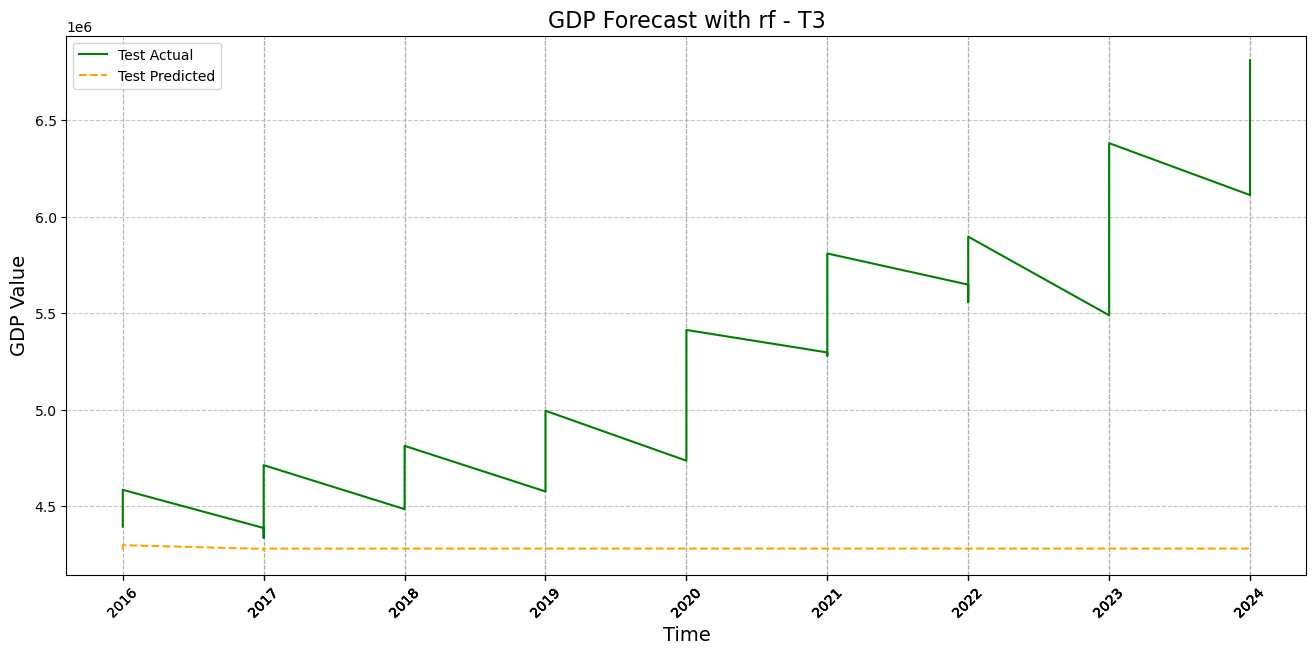

In [50]:
plot_gdp_forecast(y_mix_gdp['年份'],"rf - T3",real_test_y,rf_y_test_pred)